## Time Series Forecast of Gold Prices ($) (Exponential Smoothing)
#### By: Ryan Taron

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving 1990-2021.csv to 1990-2021.csv


In [3]:
df = pd.read_csv('1990-2021.csv', index_col='Date', parse_dates=True)
df.head()

<ipython-input-3-3cc1f4e49dc3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('1990-2021.csv', index_col='Date', parse_dates=True)


,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
Date,,,,,,,,,,,,,,,,,,
1990-01-31,415.1,321.3,59972.3,247.1,492.0,623.8,7041.0,1930.2,1.0,1557.4,745400.5,1524.9,10623.3,1867170.0,1059.9,283240.8,540.0,1063.2
1990-02-28,407.7,316.2,60672.5,241.2,485.7,607.9,6957.4,1936.8,1.0,1527.7,747408.3,1496.0,10494.1,1853648.1,1085.6,282356.4,534.1,1040.4
1990-03-30,368.5,283.9,57987.1,223.7,431.0,550.8,6334.4,1717.1,0.9,1376.8,652783.7,1348.1,9506.1,1622520.2,947.3,257424.6,488.4,976.9
1990-04-30,367.8,280.7,58375.7,224.3,428.3,533.9,6379.3,1739.6,0.9,1370.0,669724.5,1341.5,9510.6,1651644.8,982.5,258294.2,488.9,975.8
1990-05-31,363.1,280.2,55420.9,216.5,426.2,520.1,6295.5,1717.4,0.9,1371.7,671905.9,1343.2,9352.3,1646877.6,988.3,261068.1,472.2,967.3


In [4]:
df.tail()

,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
Date,,,,,,,,,,,,,,,,,,
2021-03-31,1691.1,1438.8,186861.0,1225.7,2125.4,1591.5,123639.0,11084.8,13995.6,6342.1,24562502.0,6211.5,52845.3,39020979.9,26579.1,1913845.9,2220.3,24970.5
2021-04-30,1767.7,1468.4,193213.0,1276.7,2174.6,1612.2,130934.3,11439.4,14657.4,6628.9,25533702.8,6492.8,55040.2,40753168.5,27681.4,1966245.4,2288.4,25644.2
2021-05-31,1900.0,1554.0,207845.0,1336.6,2295.3,1708.7,137979.1,12084.8,16105.4,7125.4,27131285.3,6978.3,59344.9,43786246.6,29772.2,2110939.4,2454.6,26067.3
2021-06-30,1763.2,1486.8,195692.0,1276.3,2183.3,1629.8,131054.9,11392.5,15317.4,6612.5,25565673.6,6476.3,56509.0,40580658.2,27672.6,1985571.3,2348.5,25175.6
2021-07-30,1825.8,1539.7,200376.1,1313.2,2279.2,1654.7,135863.2,11787.6,15376.5,6847.3,26404909.4,6706.3,60007.8,41910091.3,28673.4,2100068.9,2483.8,26708.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 1990-01-31 to 2021-07-30
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   United States(USD)         379 non-null    float64
 1   Europe(EUR)                379 non-null    float64
 2   Japan(JPY)                 379 non-null    float64
 3   United Kingdom(GBP)        379 non-null    float64
 4   Canada(CAD)                379 non-null    float64
 5   Switzerland(CHF)           379 non-null    float64
 6   India(INR)                 379 non-null    float64
 7   China(CNY)                 379 non-null    float64
 8   Turkey(TRY)                379 non-null    float64
 9   Saudi Arabia(SAR)          379 non-null    float64
 10  Indonesia(IDR)             379 non-null    float64
 11  United Arab Emirates(AED)  379 non-null    float64
 12  Thailand(THB)              379 non-null    float64
 13  Vietnam(VND)               379 

In [6]:
len(df)

379

## Train Test Split

In [7]:
# Train Test Split; 75-25 Rule
train_data = df.iloc[:284]
test_data = df.iloc[283:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data['United States(USD)'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [9]:
test_predictions = fitted_model.forecast(96).rename('Gold Price Forecast (USD)')
test_predictions

2013-09-30    1422.072711
2013-10-31    1413.985273
2013-11-29    1443.232926
2013-12-31    1412.232430
2014-01-31    1450.115669
                 ...     
2021-04-30    2070.569800
2021-05-31    2059.759815
2021-06-30    2036.248196
2021-07-30    2094.180980
2021-08-31    2130.430381
Freq: BM, Name: Gold Price Forecast (USD), Length: 96, dtype: float64

<Axes: xlabel='Date'>

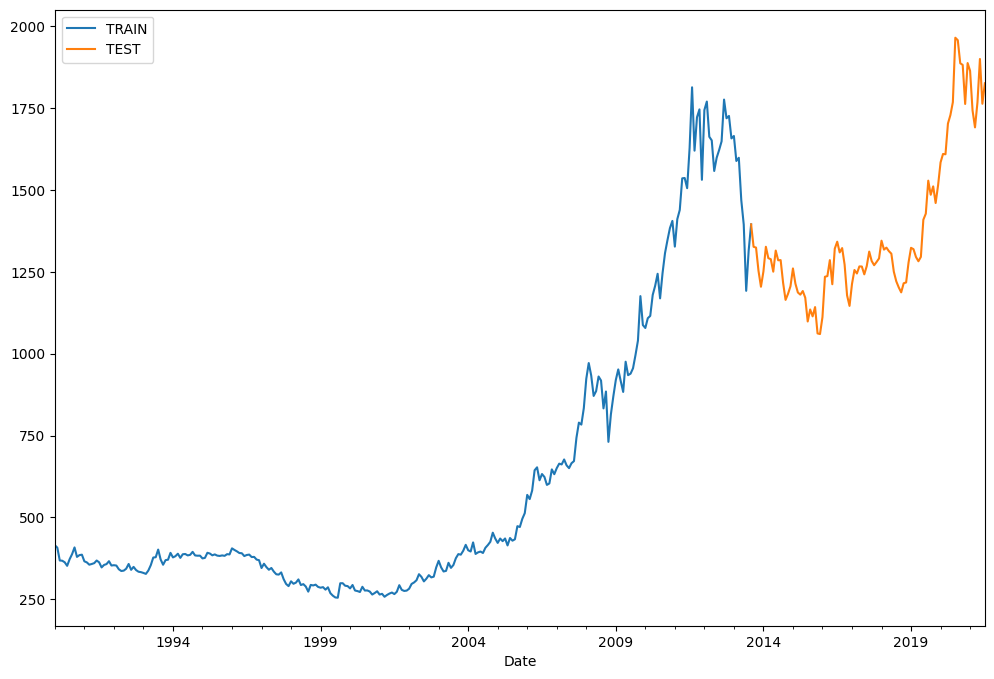

In [10]:
train_data['United States(USD)'].plot(legend=True, label='TRAIN')
test_data['United States(USD)'].plot(legend=True, label='TEST', figsize=(12,8))


<Axes: xlabel='Date'>

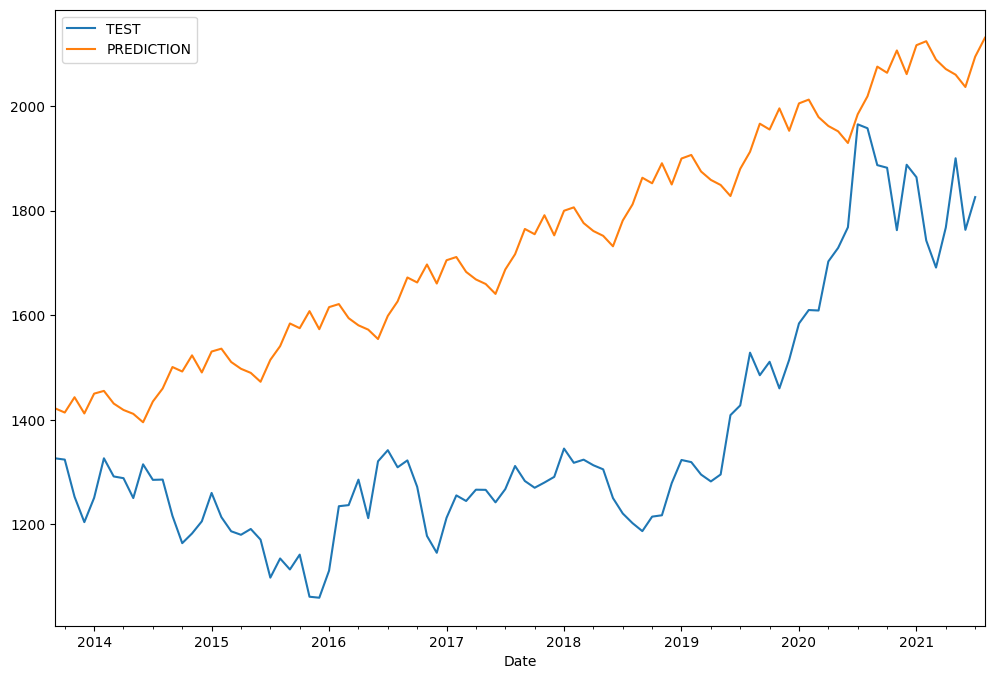

In [12]:
# Comparing test data to the actual prediction
test_data['United States(USD)'].plot(legend=True, label='TEST', figsize=(12,8))
test_predictions.plot(legend=True, label='PREDICTION', xlim=['2013-09-30','2021-08-31'])

## General Forecasting

In [15]:
final_model = ExponentialSmoothing(train_data['United States(USD)'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [18]:
forecast_predictions = final_model.forecast(96)

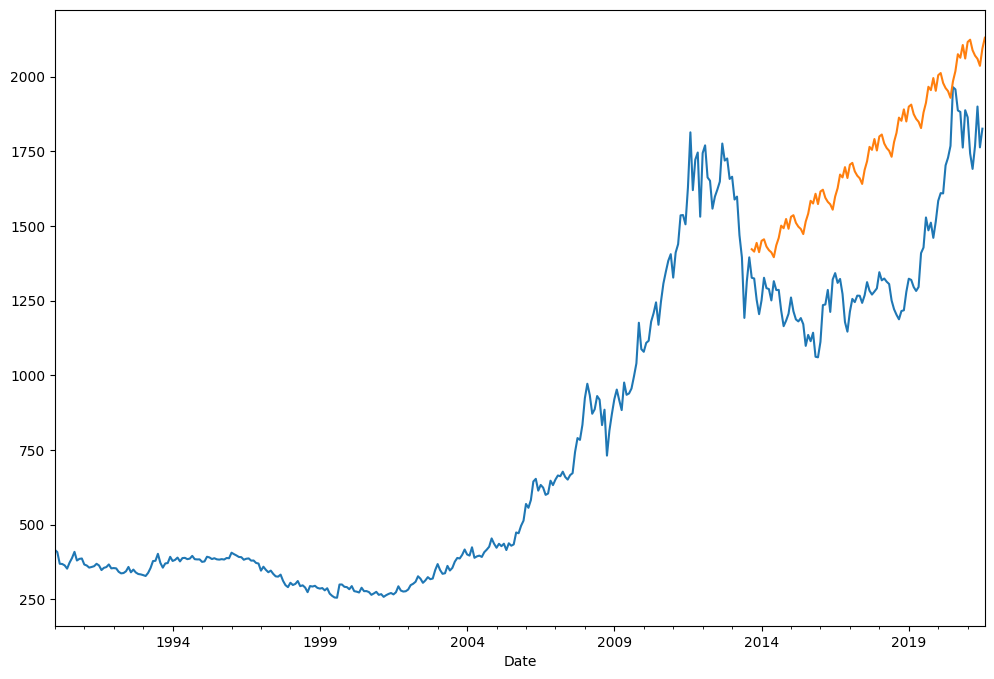

In [19]:
df['United States(USD)'].plot(figsize=(12,8))
forecast_predictions.plot();